In [1]:
import pandas as pd
import gc
import numpy as np

In [2]:
train = pd.read_feather('Feathers/ss_alltrain_typechanged.ftr')
print('loaded train')
train.set_index('index', inplace=True)
del train.index.name

loaded train


In [3]:
test = pd.read_feather('Feathers/ss_test_via_alltrain_typechanged.ftr')
print('loaded test')
test.set_index('index', inplace=True)
del test.index.name

loaded test


In [4]:
test.columns

Index(['app', 'app_day_hour_count', 'app_device_os_mean',
       'attributed_timediff', 'channel', 'device', 'hour',
       'ip_app_day_hour_count', 'ip_app_device_countfromfuture',
       'ip_app_device_countfrompast', 'ip_app_device_firsttimediff',
       'ip_app_device_lasttimediff', 'ip_app_device_mean',
       'ip_app_device_os_count', 'ip_app_device_os_countfromfuture',
       'ip_app_device_os_countfrompast', 'ip_app_device_os_firsttimediff',
       'ip_app_device_os_lasttimediff', 'ip_app_device_os_mean',
       'ip_app_device_os_time2nextclick',
       'ip_app_device_os_time2previousclick', 'ip_app_device_time2nextclick',
       'ip_app_device_time2previousclick', 'ip_app_os_day_hour_count',
       'ip_day_hour_count', 'ip_device_os_count',
       'ip_device_os_countfromfuture', 'ip_device_os_countfrompast',
       'ip_device_os_firsttimediff', 'ip_device_os_lasttimediff',
       'ip_device_os_mean', 'ip_device_os_time2nextclick',
       'ip_device_os_time2previousclick', 'ip_

In [4]:
train.drop(['matrixFact_user_ip_item_appdeviceos','matrixFact_user_ipchannel_item_appdeviceos','matrixFact_user_iposdeviceapp_item_app'], axis=1, inplace=True)

test.drop(['matrixFact_user_ip_item_appdeviceos','matrixFact_user_ipchannel_item_appdeviceos','matrixFact_user_iposdeviceapp_item_app'], axis=1, inplace=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
train['ip_app_device_os_count'].describe()

count    1.849039e+08
mean     9.223345e-04
std      9.754453e-01
min     -1.795039e-01
25%     -1.765338e-01
50%     -1.664357e-01
75%     -1.224790e-01
max      1.712249e+01
Name: ip_app_device_os_count, dtype: float64

(array([ 976.,   17.,    2.,    2.,    0.,    1.,    0.,    0.,    0.,    2.]),
 array([ -0.17950387,   1.46664361,   3.1127911 ,   4.75893858,
          6.40508607,   8.05123355,   9.69738104,  11.34352852,
         12.98967601,  14.63582349,  16.28197098]),
 <a list of 10 Patch objects>)

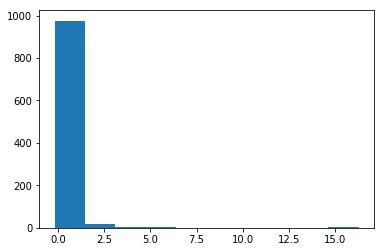

In [12]:
plt.hist(train['ip_app_device_os_count'].iloc[:1000])

In [6]:
embedding_features = ['app','channel','device','os','hour']

numeric_features = list(set(set(train.columns) - set(embedding_features)) - set(['is_attributed']))
print(numeric_features, len(numeric_features))

['ip_device_os_firsttimediff', 'ip_app_device_countfrompast', 'ip_app_device_time2previousclick', 'ip_app_device_countfromfuture', 'ip_app_device_os_lasttimediff', 'ip_device_os_time2previousclick', 'ip_device_os_countfrompast', 'ip_os_day_hour_count', 'ip_day_hour_count', 'ip_device_os_mean', 'ip_app_device_os_mean', 'ip_app_device_os_time2previousclick', 'app_day_hour_count', 'ip_app_device_os_countfrompast', 'ip_app_device_time2nextclick', 'ip_app_device_os_time2nextclick', 'app_device_os_mean', 'ip_app_device_os_count', 'ip_app_device_firsttimediff', 'ip_device_os_time2nextclick', 'attributed_timediff', 'ip_app_device_mean', 'ip_app_device_lasttimediff', 'ip_device_os_count', 'ip_app_device_os_firsttimediff', 'ip_app_day_hour_count', 'ip_app_device_os_countfromfuture', 'ip_app_os_day_hour_count', 'ip_device_os_countfromfuture', 'ip_device_os_lasttimediff'] 30


In [7]:
from tqdm import tqdm

In [8]:
bins = np.linspace(2,98,49)
print(bins)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.  30.
  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.  58.  60.
  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.  86.  88.  90.
  92.  94.  96.  98.]


In [9]:
for column in tqdm(numeric_features):
    percentiles = np.percentile(train[column], bins)
    train[column] = np.searchsorted(percentiles, train[column])
    test[column]  = np.searchsorted(percentiles, test[column])
    gc.collect()

100%|██████████| 30/30 [08:20<00:00, 16.67s/it]


(array([ 1735248.,  1886957.,  1914707.,  1937189.,  1939048.,  1891326.,
         1953449.,  1780538.,  1718944.,  2033063.]),
 array([  0. ,   4.9,   9.8,  14.7,  19.6,  24.5,  29.4,  34.3,  39.2,
         44.1,  49. ]),
 <a list of 10 Patch objects>)

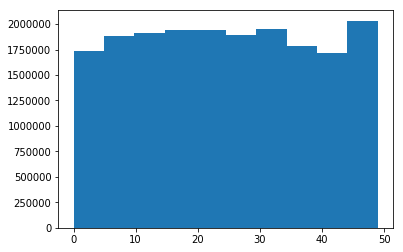

In [59]:
plt.hist(test['ip_day_hour_count'])

(array([  675390.,   805151.,   344455.,   519359.,  2563648.,  3086160.,
          880594.,  4616065.,  1888471.,  3411176.]),
 array([  0. ,   4.9,   9.8,  14.7,  19.6,  24.5,  29.4,  34.3,  39.2,
         44.1,  49. ]),
 <a list of 10 Patch objects>)

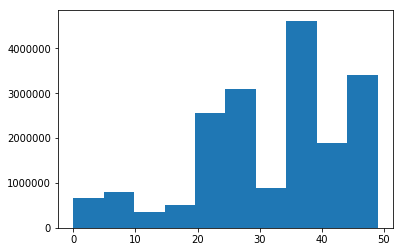

In [58]:
plt.hist(test['ip_app_device_firsttimediff'])

In [11]:
train_df = train

In [12]:
val_size = 5000000
train = train_df.iloc[:-val_size].copy()
val = train_df.iloc[-val_size:].copy()
train.shape, val.shape

((179903890, 36), (5000000, 36))

In [13]:
del train_df; gc.collect()

116

In [63]:
pos = train[train.is_attributed == 1]
print(pos.shape)

neg = train[train.is_attributed == 0]
print(neg.shape)

neg_sample = neg.sample(n=len(pos))
print(neg_sample.shape)

train_balanced = pd.concat([pos, neg_sample])
print(train_balanced.shape)

gc.collect()

(447579, 36)

In [91]:
train.shape

(179903890, 36)

In [16]:
trainY = train.is_attributed
trainY = trainY.apply(lambda x: -1 if x==0 else x)

valY = val.is_attributed
valY = valY.apply(lambda x: -1 if x==0 else x)
gc.collect()

157

In [18]:
# train_balanced.drop(['is_attributed'], axis=1, inplace=True)
train.drop(['is_attributed'], axis=1, inplace=True)
val.drop(['is_attributed'], axis=1, inplace=True)
test.drop(['is_attributed'], axis=1, inplace=True)

In [19]:
trainX = train#_balanced
valX = val
testX = test
trainX.shape, trainY.shape, valX.shape, valY.shape, testX.shape

((179903890, 35), (179903890,), (5000000, 35), (5000000,), (18790469, 35))

In [73]:
log_preds = fitpredict_logistic(trainX, trainY, testX)

In [74]:
roc_auc_score(testY, log_preds)

0.98684845254685594

In [81]:
log_preds_sub = fitpredict_logistic(trainX, trainY, test)
log_preds_sub.shape

(18790469,)

In [82]:
ori_path = '/home/kai/data/kaggle/talkingdata/data/'

test_ori = pd.read_csv(ori_path+"test.csv", usecols=['ip','app','device','os', 'channel', 'click_time', 'click_id'])

In [83]:
sub = pd.DataFrame()
sub['click_id'] = test_ori['click_id'].astype('int')

# print("predicting....")
sub['is_attributed'] = log_preds_sub

tempid = str(int(time.time()))[3:]
print(tempid)

flag = 'logistic'
sub.to_csv('FM_SUBS/fm_{}_{}.csv.gz'.format(flag, tempid), index=False, float_format='%.9f', compression='gzip')

predicting....
6441926


In [75]:
fastfm_preds = fitpredict_fastfm(trainX, trainY, testX)

In [76]:
roc_auc_score(testY, fastfm_preds)

0.98620862090756378

In [22]:
encoder = OneHotEncoder(handle_unknown='ignore').fit(trainX)
trainX = encoder.transform(trainX)
valX = encoder.transform(valX)
testX = encoder.transform(testX)

MemoryError: 

In [ ]:
gc.collect()

In [ ]:
clf = FMClassification(rank=8, n_iter=100)
#clf.fit_predict_proba(trainX, trainY, testX)    

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from itertools import combinations

def load_problem_flight(large=False, convert_to_ints=False):
    '''
    Dataset used in common ML benchmarks: https://github.com/szilard/benchm-ml
    links to files:
    https://s3.amazonaws.com/benchm-ml--main/test.csv
    https://s3.amazonaws.com/benchm-ml--main/train-0.1m.csv
    https://s3.amazonaws.com/benchm-ml--main/train-1m.csv
    https://s3.amazonaws.com/benchm-ml--main/train-10m.csv
    '''
    if large:
        trainX = pd.read_csv('data/flight/flight_train-10m.csv')
    else:
        trainX = pd.read_csv('data/flight/flight_train-1m.csv')
    testX  = pd.read_csv('data/flight/flight_test.csv')
    
    trainY = (trainX.dep_delayed_15min.values == 'Y') * 1
    testY  = (testX.dep_delayed_15min.values == 'Y') * 1
    
    trainX = trainX.drop('dep_delayed_15min', axis=1)
    testX  = testX.drop('dep_delayed_15min', axis=1)
    if convert_to_ints:
        pdb.set_trace()
        categoricals = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest',]
        continous = ['Distance']
        
        trainX, testX = process_categorical_features(trainX, testX, columns=categoricals)
        trainX, testX = process_continuous_features(trainX, testX, columns=continous)

        trainX['DepTime'] = trainX['DepTime'] // 100
        testX['DepTime'] = testX['DepTime']   // 100
    
    return trainX, testX, trainY, testY

def load_problem_flight_extended(large=False):
    trainX, testX, trainY, testY = load_problem_flight(large=large, convert_to_ints=True)
    for column1, column2 in combinations(['UniqueCarrier', 'Origin', 'Dest', 'DepTime'], 2):
        new_column = column1 + '_' + column2
        trainX[new_column] = trainX[column1] * 10000 + trainX[column2]
        testX[new_column]  = testX[column1] * 10000 + testX[column2]
    trainX, testX = process_categorical_features(trainX, testX, columns=trainX.columns)
    return trainX, testX, trainY, testY    

def load_problem_movielens_100k(all_features=False):
    '''Standard test dataset for recommendation systems
    From http://grouplens.org/datasets/movielens/
    '''
    folder = 'data/ml-100k'
    ratings = pd.read_csv(folder + '/u.data', sep='\t', 
                              names=['user', 'movie', 'rating', 'timestamp'], header=None)
    ratings = ratings.drop('timestamp', axis=1)
    if all_features:
        users   = pd.read_csv(folder + '/u.user', sep='|', 
                                  names=['user', 'age', 'gender', 'occupation', 'zip'], header=None)
        movies  = pd.read_csv(folder + '/u.item', sep='|',
           names=['movie', 'title','released','video_release', 'IMDb URL','unknown','Action','Adventure','Animation',
            'Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir',
            'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'], header=None, encoding='latin-1')
        
        movies = movies.drop(['title', 'IMDb URL', 'video_release'], axis=1)
        movies['released'] = pds.to_datetime(movies['released']).map(lambda z: z.year)
        ratings = pd.merge(pd.merge(ratings, users, on='user'), movies, on='movie')

    answers = ratings['rating'].values
    ratings = ratings.drop('rating', axis=1)

    for feature in ratings.columns:
        _, ratings[feature] = np.unique(ratings[feature], return_inverse=True)
        
    trainX, testX, trainY, testY = train_test_split(ratings, answers, test_size=0.25, random_state=42)
    return trainX, testX, trainY, testY


def load_problem_movielens_1m(all_features=False):
    '''
    Standard test dataset for recommendation systems
    From http://grouplens.org/datasets/movielens/
    '''
    folder = 'data/ml-1m'
    ratings = pd.read_csv(folder + '/ratings.dat', sep='::', 
                              names=['user', 'movie', 'rating', 'timestamp'], header=None)
    ratings = ratings.drop('timestamp', axis=1)
#     pdb.set_trace()
    if all_features:
        users = pd.read_csv(folder + '/users.dat', sep='::', 
                                names=['user', 'gender', 'age', 'occupation', 'zip'], header=None)
        movies = pd.read_csv(folder + '/movies.dat', sep='::', names=['movie', 'title', 'genres'], header=None)
        sparse_genres = CountVectorizer().fit_transform(movies.genres.map(lambda x: x.replace('|', ' ')))
        sparse_genres = pd.DataFrame(sparse_genres.todense())
        movies = pd.concat([movies[['movie']], sparse_genres], axis=1)    
        ratings = pd.merge(pd.merge(ratings, users, on='user'), movies, on='movie')

    answers = ratings['rating'].values
    ratings = ratings.drop('rating', axis=1)

    for feature in ratings.columns:
        _, ratings[feature] = np.unique(ratings[feature], return_inverse=True)
        
    trainX, testX, trainY, testY = train_test_split(ratings, answers, test_size=0.25, random_state=42)
    return trainX, testX, trainY, testY


def preprocess_ad_problem():
    """
    Kaggle competition on CTR prediction: https://www.kaggle.com/c/avazu-ctr-prediction
    """
    av_train = pd.read_csv('../data/ad_train.csv')
    for column in av_train.columns:
        if column != 'hour':        
            av_train[column] = np.unique(av_train[column], return_inverse=True)[1].astype('uint16')
            
    for column in av_train.columns:
        if np.max(av_train[column]) < 250:
            av_train[column] = av_train[column].astype('uint8')
        elif np.max(av_train[column]) < 65000:
            av_train[column] = av_train[column].astype('uint16')
        else:
            av_train[column] = av_train[column].astype('uint32')            
            
    av_train.to_hdf('../data/ad_updated_train.hdf5', 'data')
            
def load_problem_ad(train_size=1000000, test_size=10000000):
    """
    Kaggle competition on CTR prediction: https://www.kaggle.com/c/avazu-ctr-prediction
    First use preprocess ad.
    """
    data = pd.read_hdf('../data/ad_updated_train.hdf5', 'data')
    data['day'] = (data['hour'] // 100) % 100
    data['hour'] = data['hour'] % 100
    answers = data['click'].values
    data = data.drop('click', axis=1)
    trainX, testX, trainY, testY = train_test_split(data, answers, train_size=train_size, test_size=test_size, random_state=42)
    return trainX, testX, trainY.astype('int'), testY.astype('int')

def remap(column, lookup):
    return (np.searchsorted(lookup, column) + 1) * np.in1d(column, lookup)

def process_categorical_features(trainX, testX, columns, copy=True):
    if copy:
        trainX = trainX.copy()
        testX = testX.copy()
    
    for column in columns:
        lookup = np.unique(trainX[column])
        trainX[column] = remap(trainX[column], lookup)
        testX[column] = remap(testX[column], lookup)
    
    return trainX, testX
        
def process_continuous_features(trainX, testX, columns, copy=True):
    if copy:
        trainX = trainX.copy()
        testX = testX.copy()
    
    for column in columns:
        percentiles = np.percentile(trainX[column], [10, 20, 30, 40, 50, 60, 70, 80, 90])
        trainX[column] = np.searchsorted(percentiles, trainX[column])
        testX[column]  = np.searchsorted(percentiles, testX[column])
    
    return trainX, testX







import pickle
from sklearn.metrics import roc_auc_score, mean_squared_error

from fastFM.mcmc import FMClassification, FMRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.datasets import dump_svmlight_file
from pyfm import pylibfm

import pdb

def fitpredict_logistic(trainX, trainY, testX, classification=True, **params):
#     pdb.set_trace()
    encoder = OneHotEncoder(handle_unknown='ignore').fit(trainX)
    trainX = encoder.transform(trainX)
    testX = encoder.transform(testX)
    if classification:
        clf = LogisticRegression(**params)
        clf.fit(trainX, trainY)
        return clf.predict_proba(testX)[:, 1]
    else:
        clf = Ridge(**params)
        clf.fit(trainX, trainY)
        return clf.predict(testX)

def fitpredict_fastfm(trainX, trainY, testX, classification=True, rank=8, n_iter=100):
    encoder = OneHotEncoder(handle_unknown='ignore').fit(trainX)
    trainX = encoder.transform(trainX)
    testX = encoder.transform(testX)
    if classification:
        clf = FMClassification(rank=rank, n_iter=n_iter)
        return clf.fit_predict_proba(trainX, trainY, testX)
    else:
        clf = FMRegression(rank=rank, n_iter=n_iter)
        return clf.fit_predict(trainX, trainY, testX)  

def fitpredict_libfm(trainX, trainY, testX, classification=True, rank=8, n_iter=100):
    encoder = OneHotEncoder(handle_unknown='ignore').fit(trainX)
    trainX = encoder.transform(trainX)
    testX = encoder.transform(testX)
    train_file = 'libfm_train.txt'
    test_file = 'libfm_test.txt'
    with open(train_file, 'wb') as f:
        dump_svmlight_file(trainX, trainY, f=f)
    with open(test_file, 'wb') as f:
        dump_svmlight_file(testX, np.zeros(testX.shape[0]), f=f)
    task = 'c' if classification else 'r'
    LIBFM_PATH = '/home/kai/data/resources/libfm/bin/libFM'
    console_output = !$LIBFM_PATH -task $task -method mcmc -train $train_file -test $test_file -iter $n_iter -dim '1,1,$rank' -out output.libfm
    
    libfm_pred = pd.read_csv('output.libfm', header=None).values.flatten()
    return libfm_pred

def fitpredict_pylibfm(trainX, trainY, testX, classification=True, rank=8, n_iter=10):
    encoder = OneHotEncoder(handle_unknown='ignore').fit(trainX)
    trainX = encoder.transform(trainX)
    testX = encoder.transform(testX)
    task = 'classification' if classification else 'regression'
    fm = pylibfm.FM(num_factors=rank, num_iter=n_iter, verbose=False, task=task)
    if classification:
        fm.fit(trainX, trainY)
    else:
        fm.fit(trainX, trainY * 1.)
    return fm.predict(testX)






from collections import OrderedDict
import time

all_results = OrderedDict()
try:
    with open('./saved_results.pkl') as f:
        all_results = pickle.load(f)
except:
    pass

def test_on_dataset(trainX, testX, trainY, testY, task_name, classification=True, use_pylibfm=True):
#     pdb.set_trace()
    algorithms = OrderedDict()
    algorithms['logistic'] = fitpredict_logistic
    algorithms['libFM']    = fitpredict_libfm
    algorithms['fastFM']   = fitpredict_fastfm
    if use_pylibfm:
        algorithms['pylibfm']  = fitpredict_pylibfm
    
    results = pd.DataFrame()
    for name, fit_predict in algorithms.items():
        start = time.time()
        predictions = fit_predict(trainX, trainY, testX, classification=classification)
        spent_time = time.time() - start
        results.loc[name, 'time'] = spent_time
        if classification:
            results.loc[name, 'ROC AUC'] = roc_auc_score(testY, predictions)
        else:
            results.loc[name, 'RMSE'] = np.mean((testY - predictions) ** 2) ** 0.5
            
    all_results[task_name] = results
#     with open('saved_results.pkl', 'w') as f:
#         pickle.dump(all_results, f)
        
    return results